In [178]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [179]:
data = pd.read_csv(r"C:\Users\Usuario\personal_projects\machineLearning_projects\supervised_learning\XGBoost_projects\XGBoost_house_price_prediction\supervised_learning_projects\data\raw\data.csv",
                   parse_dates = [0])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [181]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536


In [182]:
print(data['bedrooms'].value_counts())

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64


In [183]:
# Convert bedrooms and bathrooms to integer
data['bedrooms'] = data['bedrooms'].astype('int')
data['bathrooms'] = data['bathrooms'].astype('int')
data['city'] = data['city'].astype('category')

In [184]:
data['sqft_living'].describe()

count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [185]:
data['sqft_lot'].describe()

count    4.600000e+03
mean     1.485252e+04
std      3.588444e+04
min      6.380000e+02
25%      5.000750e+03
50%      7.683000e+03
75%      1.100125e+04
max      1.074218e+06
Name: sqft_lot, dtype: float64

In [186]:
print(data['bedrooms'].value_counts())

bedrooms
3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: count, dtype: int64


In [187]:
print(data['floors'].value_counts())

floors
1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: count, dtype: int64


In [188]:
print(data['waterfront'].value_counts())

waterfront
0    4567
1      33
Name: count, dtype: int64


In [189]:
print(data['view'].value_counts())

view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64


In [190]:
print(data['condition'].value_counts())

condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64


In [191]:
data['yr_built'].describe()

count    4600.000000
mean     1970.786304
std        29.731848
min      1900.000000
25%      1951.000000
50%      1976.000000
75%      1997.000000
max      2014.000000
Name: yr_built, dtype: float64

In [192]:
current_year = datetime.now().year
data['house_age'] = current_year - data['yr_built']
print(data['house_age'].describe())

count    4600.000000
mean       52.213696
std        29.731848
min         9.000000
25%        26.000000
50%        47.000000
75%        72.000000
max       123.000000
Name: house_age, dtype: float64


In [193]:
print(data['house_age'].dtype)

int64


In [194]:
data['yr_renovated'].describe()

count    4600.000000
mean      808.608261
std       979.414536
min         0.000000
25%         0.000000
50%         0.000000
75%      1999.000000
max      2014.000000
Name: yr_renovated, dtype: float64

In [195]:
print(data['yr_renovated'].value_counts())

yr_renovated
0       2735
2000     170
2003     151
2009     109
2001     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2012      45
2008      45
1988      43
1999      41
2002      41
1983      41
1998      40
1993      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1996      22
1982      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1970       9
1968       9
1954       8
1945       7
2007       7
1974       6
1934       6
1971       5
1958       5
1986       5
1978       3
1980       2
1995       2
1955       2
1977       1
1913       1
1991       1
1948       1
1966       1
1960       1
1987       1
1953       1
1981       1
1975       1
Name: count, dtype: int64


In [196]:
data.loc[data['yr_renovated'] == 0, 'yr_renovated'] = data.loc[data['yr_renovated'] == 0, 'yr_built']

In [197]:
data['yr_renovated'].describe()

count    4600.000000
mean     1985.042609
std        26.863922
min      1900.000000
25%      1973.000000
50%      1994.000000
75%      2005.000000
max      2014.000000
Name: yr_renovated, dtype: float64

In [198]:
print(data['yr_renovated'].value_counts())

yr_renovated
2003    240
2000    218
2005    199
2006    179
2001    177
       ... 
1936      3
1935      3
1900      3
1932      2
1939      2
Name: count, Length: 111, dtype: int64


In [199]:
data['years_since_last_renovation'] = current_year - data['yr_renovated']
print(data['years_since_last_renovation'].describe())

count    4600.000000
mean       37.957391
std        26.863922
min         9.000000
25%        18.000000
50%        29.000000
75%        50.000000
max       123.000000
Name: years_since_last_renovation, dtype: float64


In [200]:
print(data['years_since_last_renovation'].value_counts())

years_since_last_renovation
20     240
23     218
18     199
17     179
22     177
      ... 
87       3
88       3
123      3
91       2
84       2
Name: count, Length: 111, dtype: int64


In [201]:
# Initialize the LabelEncoder
#label_encoder = LabelEncoder()
# Apply Label Encoding to the 'City' column
#data['city_LabelEncoded'] = label_encoder.fit_transform(data['city'])

In [202]:
duplicates = data[data.duplicated(subset=None)]
duplicates.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         0 non-null      datetime64[ns]
 1   price                        0 non-null      float64       
 2   bedrooms                     0 non-null      int32         
 3   bathrooms                    0 non-null      int32         
 4   sqft_living                  0 non-null      int64         
 5   sqft_lot                     0 non-null      int64         
 6   floors                       0 non-null      float64       
 7   waterfront                   0 non-null      int64         
 8   view                         0 non-null      int64         
 9   condition                    0 non-null      int64         
 10  sqft_above                   0 non-null      int64         
 11  sqft_basement                0 non-null      int64         
 1

In [203]:
columns_to_drop = ['date', 'yr_built','yr_renovated','street','statezip','country','city']
processed_data = data.drop(columns_to_drop, axis=1)
processed_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        4600 non-null   float64
 1   bedrooms                     4600 non-null   int32  
 2   bathrooms                    4600 non-null   int32  
 3   sqft_living                  4600 non-null   int64  
 4   sqft_lot                     4600 non-null   int64  
 5   floors                       4600 non-null   float64
 6   waterfront                   4600 non-null   int64  
 7   view                         4600 non-null   int64  
 8   condition                    4600 non-null   int64  
 9   sqft_above                   4600 non-null   int64  
 10  sqft_basement                4600 non-null   int64  
 11  house_age                    4600 non-null   int64  
 12  years_since_last_renovation  4600 non-null   int64  
dtypes: float64(2), int

In [204]:
processed_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,house_age,years_since_last_renovation
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,52.213696,37.957391
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,26.863922
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,9.000000,9.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,26.000000,18.000000
50%,4.609435e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,47.000000,29.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,72.000000,50.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,123.000000,123.000000


In [205]:
# Print out the column correlations of the processed_data dataset
print(processed_data.corr())

                                price  bedrooms  bathrooms  sqft_living  \
price                        1.000000  0.200336   0.317229     0.430410   
bedrooms                     0.200336  1.000000   0.498491     0.594884   
bathrooms                    0.317229  0.498491   1.000000     0.711253   
sqft_living                  0.430410  0.594884   0.711253     1.000000   
sqft_lot                     0.050451  0.068819   0.109521     0.210538   
floors                       0.151461  0.177895   0.459006     0.344850   
waterfront                   0.135648 -0.003483   0.071806     0.117616   
view                         0.228504  0.111028   0.203389     0.311009   
condition                    0.034915  0.025080  -0.118819    -0.062826   
sqft_above                   0.367570  0.484705   0.649091     0.876443   
sqft_basement                0.210427  0.334165   0.270301     0.447206   
house_age                   -0.021857 -0.142461  -0.394516    -0.287775   
years_since_last_renovati

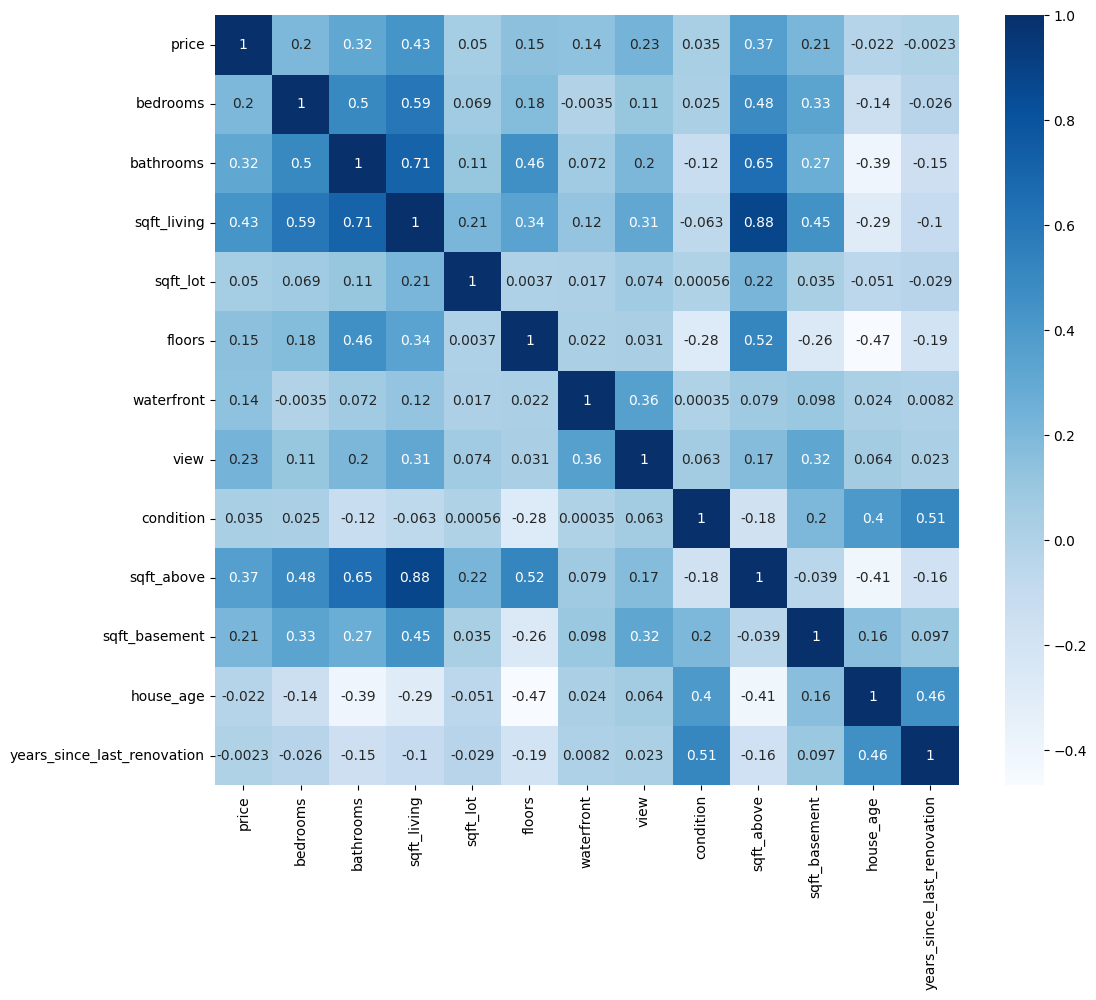

In [206]:
plt.figure(figsize=(12,10))
sns.heatmap(processed_data.corr(numeric_only=True),cmap='Blues',annot=True);

In [207]:
processed_data.to_csv(r'C:\Users\Usuario\personal_projects\machineLearning_projects\supervised_learning\XGBoost_projects\XGBoost_house_price_prediction\supervised_learning_projects\data\processed\processed_data.csv', index=False)